# What is the goal of the project ?

Assisting Airbnb hosts to set appropriate price for their listings

The Problem: Currently there is no convenient way for a new Airbnb host to decide the price of his or her listing. New hosts must often rely on the price of neighbouring listings when deciding on the price of their own listing.

The Solution: A Predictive Price Modelling tool whereby a new host can enter all the relevant details such as location of the listing, listing properties, available amenities etc and the Machine Learning Model will suggest the Price for the listing. The Model would have previously been trained on similar data from already existing Airbnb listings.

## Project Overview


The project involves the following steps,

1) Exploratory Data Analysis: Explore the various features, their distributions using Histograms and Box-plots, explore questions such as the most popular neighbourhoods, factors influencing rental prices, or the relationship between amenities and pricing. 
2) Pre-processing and Data Cleaning: Normalisation, filling missing values, encoding categorical values,
handling outliers and data inconsistencies.
3) Feature Selection and Feature Engineering:Study the correlation with response variable (Listing Price) and determine which features are most useful in predicting the price. Derive new features from the existing dataset to enhance the predictive power of the models.
4) Model Building, Evaluation, Selection: Training different models, tuning hyper-parameters, evaluating the performance of models using appropriate metrics such as mean squared error (MSE) or root mean squared error(RMSE).Choose the best-performing model.


### 1) Exploratory Data Analysis:


1) The number of listings : district wise /  District piechart / Map of districts
2) The number of listings : neighbourhood wise / Top 10 Neighborhoods with the Most Listings
3) The number of listings : Room type
4) Boxplot : Listing price by district / District-Price Distribution heatmap / Average Price by District
5) Boxplot : Listing price by Room type / Average Price by Room Type

6) Key Finding:
7) Conclusion:

##############################################################################################################

### 1) Exploratory Data Analysis:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("/Users/zhoramkoyan/Desktop/Project 2nd approach/Downloaded data/listings.csv")
df.head()

/var/folders/gt/hxr26ny102bdtmmfdslxf5080000gn/T/ipykernel_40388/2692671911.py:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/zhoramkoyan/Desktop/Project 2nd approach/Downloaded data/listings.csv")


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,801749842377802394,https://www.airbnb.com/rooms/801749842377802394,20230306014634,2023-03-06,city scrape,A home away from home,The whole group will be comfortable in this sp...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495455523,https://www.airbnb.com/users/show/495455523,Michael,2023-01-10,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/773ed...,https://a0.muscache.com/im/pictures/user/773ed...,Canarsie,1.0,1.0,"['email', 'phone']",t,f,NaN,Canarsie,Brooklyn,40.640403,-73.888535,Private room in home,Private room,2,NaN,1 bath,1.0,1.0,"[""50\"" TV"", ""Bathtub"", ""Microwave"", ""Free driv...",$143.00,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,30,60,90,364,2023-03-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,765948794133787266,https://www.airbnb.com/rooms/765948794133787266,20230306014634,2023-03-06,city scrape,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488760226,https://www.airbnb.com/users/show/488760226,Eric,2022-11-22,NaN,NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/87e00...,https://a0.muscache.com/im/pictures/user/87e00...,Canarsie,2.0,5.0,"['email', 'phone']",t,t,NaN,Canarsie,Brooklyn,40.648510,-73.894330,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Free parking on premises"", ""Carbon monoxide ...",$30.00,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,15,19,38,41,2023-03-06,13,13,5,2022-12-06,2023-02-19,4.85,4.77,4.77,4.85,4.92,4.85,4.92,NaN,t,2,1,1,0,4.29
2,636274456676328779,https://www.airbnb.com/rooms/636274456676328779,20230306014634,2023-03-06,city scrape,Villa Masino.,Close to beach Peaceful walk to park & beach...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,461263600,https://www.airbnb.com/users/show/461263600,Tommaso,2022-05-27,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Tottenville,1.0,1.0,"['email', 'phone']",f,f,NaN,Tottenville,Staten Island,40.507114,-74.251907,Entire villa,Entire home/apt,6,NaN,2 baths,2.0,2.0,"[""BBQ grill"", ""Security cameras on property"", ...",$157.00,1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,30,60,90,364,2023-03-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,768125251187660469,https://www.airbnb.com/rooms/768125251187660469,20230306014634,2023-03-06,city scrape,1-Bedroom Private Room with King Size Bed,Private room with king size bedroom near Sheep...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,475699129,https://www.airbnb.com/users/show/475699129,Suliman,2022-08-18,NaN,NaN,within an hour,99%,98%,t,http

In [4]:
df.rename(columns={'neighbourhood_group_cleansed': 'District'}, inplace=True)

In [5]:
df.rename(columns={'neighbourhood_cleansed': 'Neighbourhood'}, inplace=True)

In [ ]:
# 
df['price'] = df['price'].str.replace('$', '').astype(str)
df['price'] = df['price'].str.replace(',', '').astype(str)
df['price'] = pd.to_numeric(df["price"])

#### 1) The number of listings : district wise / District piechart / Map of districts


In [7]:
airbnb_pivot = pd.pivot_table(df, index=['District'], values='id', aggfunc=['count'], 
                              margins=True, margins_name='Total Count')
airbnb_pivot

,count
,id
District,
Bronx,1691
Brooklyn,16237
Manhattan,17658
Queens,6916
Staten Island,429
Total Count,42931


By creating a pivot table of the total number of listings grouped by the different Districts, we learn that out of the 42,931 listings being analyzed, 17,658 of them are located in Manhattan and 16,237 in Brooklyn. Staten Island shows up last with only 429 listings.

We can use a pie chart to better visualize how the numbers are distributed in percentages:

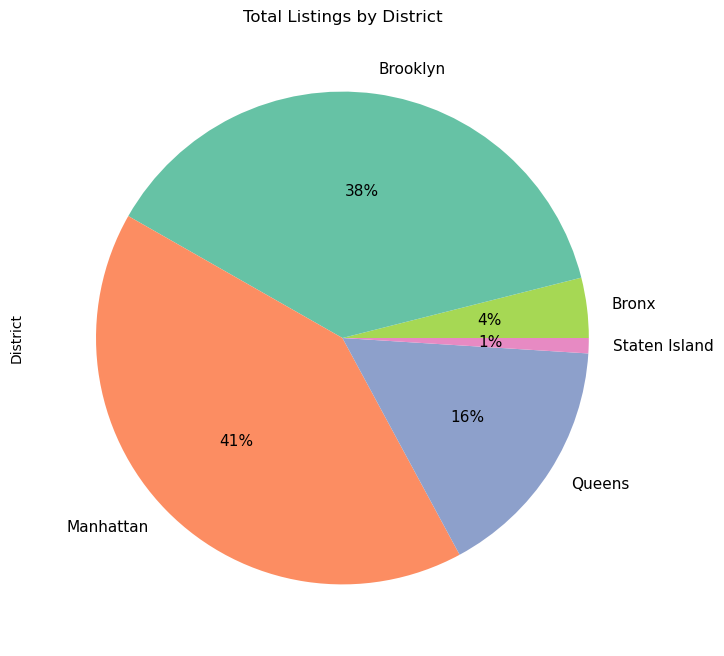

In [8]:
df2 = df.groupby(['District'])['id'].count()
df2.plot.pie(ylabel='District', title='Total Listings by District', 
             autopct='%1.0f%%', fontsize='11', colors=['#a6d854', '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'],
             startangle=0, figsize=(10,8))
plt.show()

We can see that Manhattan has the highest number of listings - making up for 41% of the total - followed by Brooklyn with 38%. The other three districts have significantly less listings: Queens (16%), Bronx (4%), and Staten Island (1%).

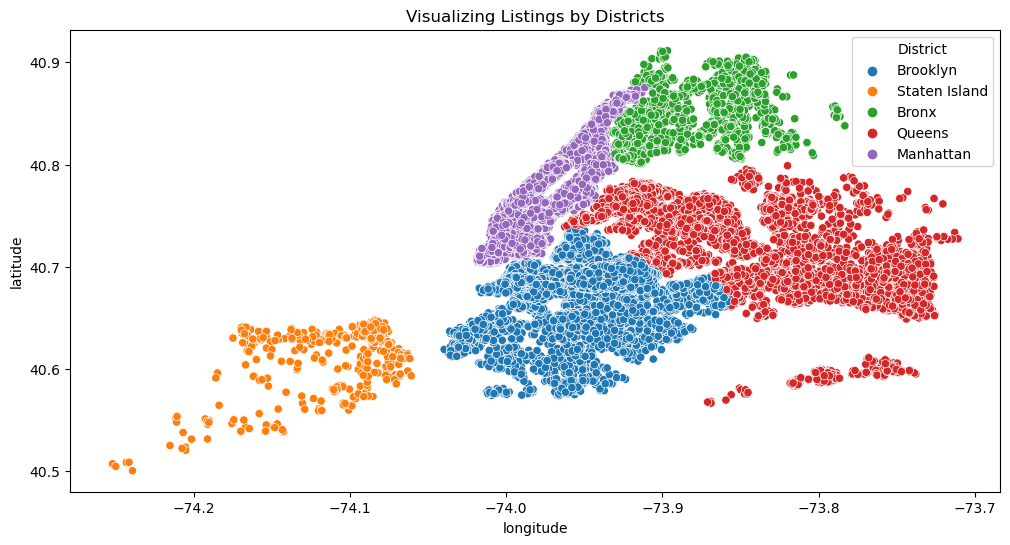

In [9]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
sns.scatterplot(df.longitude, df.latitude, 
                hue=df.District).set_title('Visualizing Listings by Districts')
plt.ioff()

Map of districts - dots representing listings

#### 2) The number of listings : neighbourhood wise


In [12]:
airbnb_pivot = pd.pivot_table(df, index=['Neighbourhood'], values='id', aggfunc=['count'], 
                              margins=True, margins_name='Total Count')
sorted_pivot = airbnb_pivot.sort_values(by=('count', 'id'), ascending=False).head(11)
sorted_pivot

,count
,id
Neighbourhood,
Total Count,42931
Bedford-Stuyvesant,3086
Williamsburg,2597
Midtown,2182
Harlem,2081
Bushwick,1810
Upper West Side,1541
Hell's Kitchen,1522


As we can see the most common(with highest number of listings) 10 Neighborhoods are:
1) Bedford–Stuyvesant, Brooklyn
2) Williamsburg, Brooklyn
3) Midtown, Manhattan
4) Harlem, Manhattan
5) Bushwick, Brooklyn
6) Upper West Side, Manhattan
7) Hell's Kitchen,	Manhattan
8) Upper East Side, Manhattan
9) Crown Heights, Brooklyn
10) East Village, Manhattan


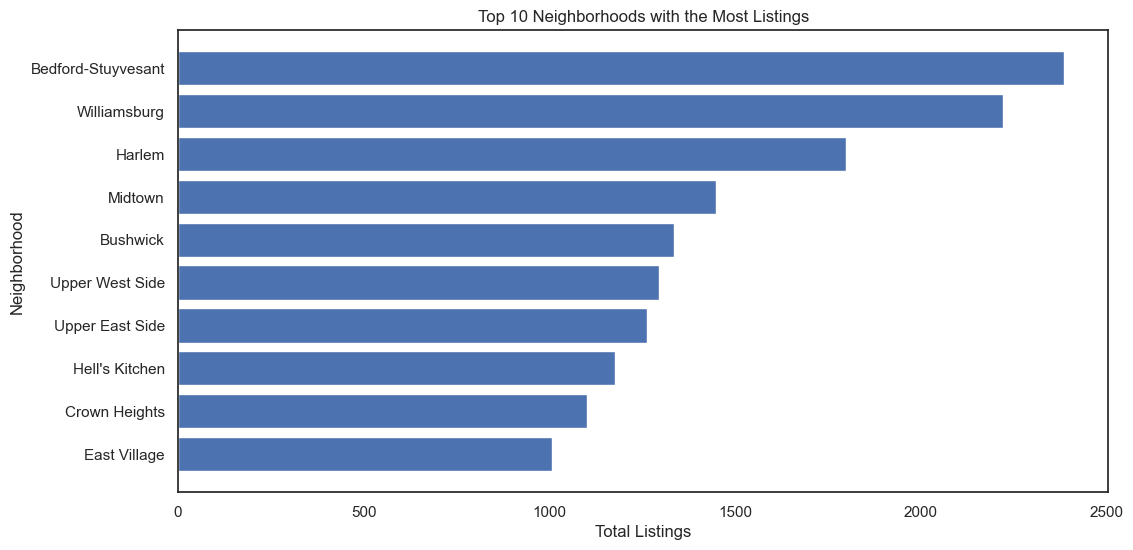

In [26]:
df_4 = df.groupby(['Neighbourhood'])['id'].count().nlargest(10)

plt.figure(figsize=(12,6))
x = list(df_4.index)
y = list(df_4.values)
x.reverse()
y.reverse()

plt.title("Top 10 Neighborhoods with the Most Listings")
plt.ylabel("Neighborhood")
plt.xlabel("Total Listings")

plt.barh(x, y)
plt.show()

Visualizing

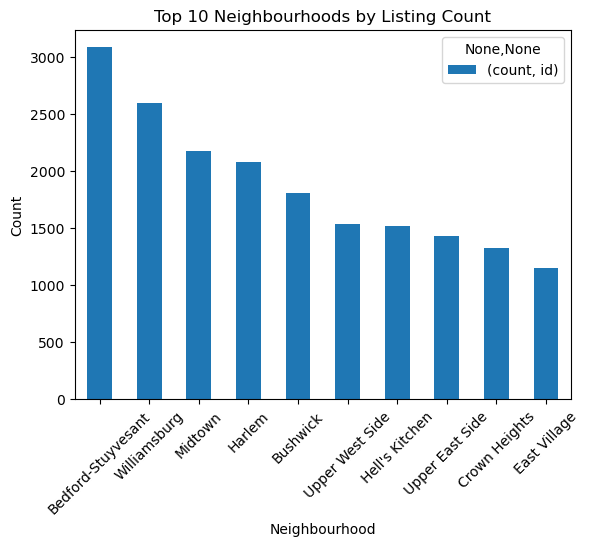

In [13]:
sorted_pivot = sorted_pivot[1:]

sorted_pivot.plot.bar()
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Top 10 Neighbourhoods by Listing Count')
plt.xticks(rotation=45)

plt.show()

#### 3) The number of listings : Room type


In [14]:
airbnb_pivot = pd.pivot_table(df, index=['room_type'], values='id', aggfunc=['count'], 
                              margins=True, margins_name='Total Count')
sorted_pivot2 = airbnb_pivot.sort_values(by=('count', 'id'), ascending=False).head(10)
sorted_pivot2

,count
,id
room_type,
Total Count,42931
Entire home/apt,24279
Private room,17879
Shared room,576
Hotel room,197


As we can see 24279 listings are Entire home/apt, 17879 are Private room, 576 are Shared room, 197 are Hotel room.

Visualizing

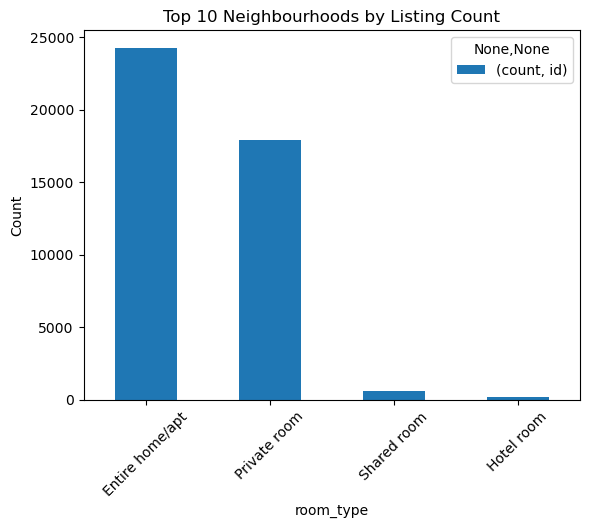

In [15]:
sorted_pivot2 = sorted_pivot2[1:]
sorted_pivot2.plot.bar()
plt.xlabel('room_type')
plt.ylabel('Count')
plt.title('Top 10 Neighbourhoods by Listing Count')
plt.xticks(rotation=45)

plt.show()

##############################################################################################################

Before starting this part, let's remove outliers

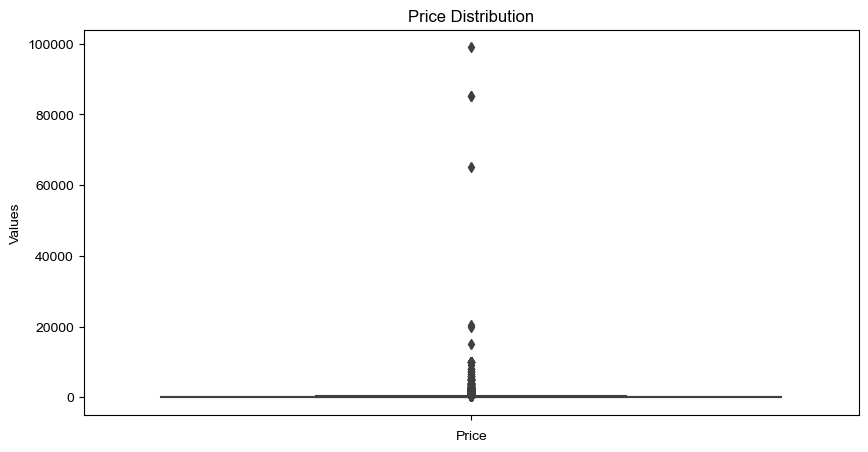

In [17]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=df).set_title('Price Distribution')
sns.set_theme(style='white')
plt.xlabel('Price')
plt.ylabel('Values')
plt.show()

In [18]:
# low quantile
q_low = df['price'].quantile(0.10)
print(q_low)
# high quantile
q_high = df['price'].quantile(0.90)
print(q_high)


50.0
339.0


In [19]:
# removing rows with values below 0.10
df = df.drop(df[df.price < q_low].index)
# removing rows with values above 0.90
df = df.drop(df[df.price > q_high].index)

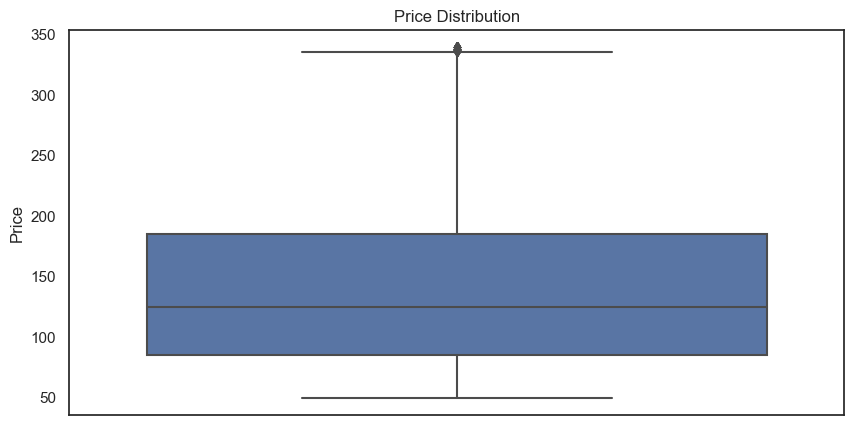

In [20]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=df).set_title('Price Distribution')
sns.set_theme(style='white')
plt.ylabel('Price')
plt.show()

##############################################################################################################

#### 4) Boxplot : Listing price by district /  District-Price Distribution heatmap / Average Price by District


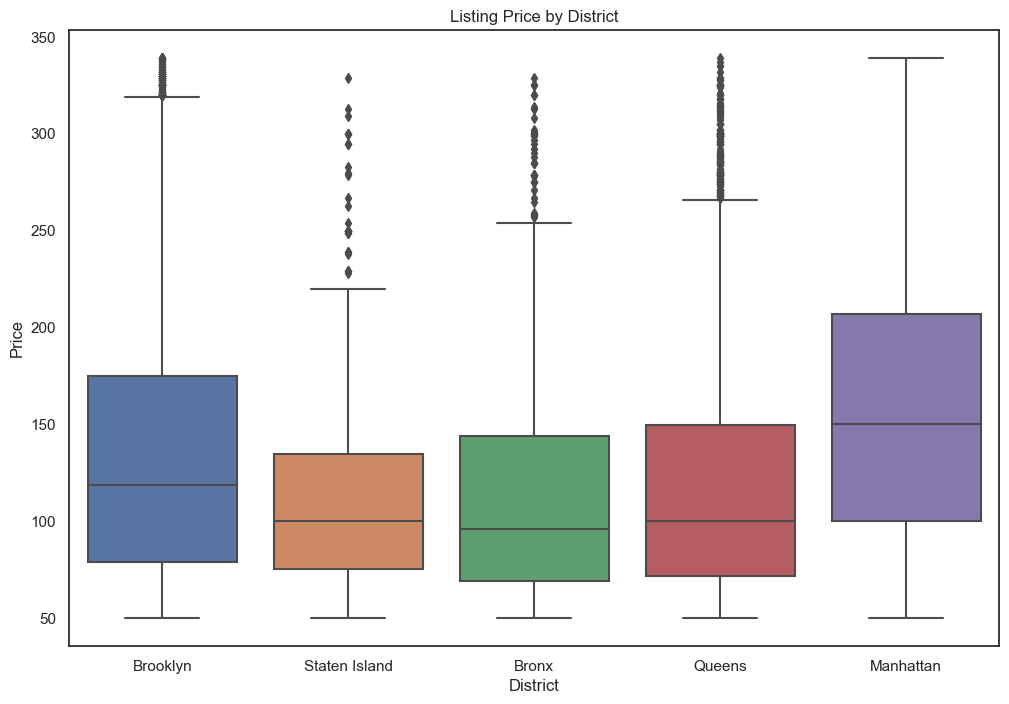

In [21]:
plt.figure(figsize=(12, 8))
plt.title('Listing Price by District')

sns.boxplot(data=df, x='District', y='price')

plt.xlabel('District')
plt.ylabel('Price')

plt.show()


The following boxplots shows the distribution of listing prices across various Districts

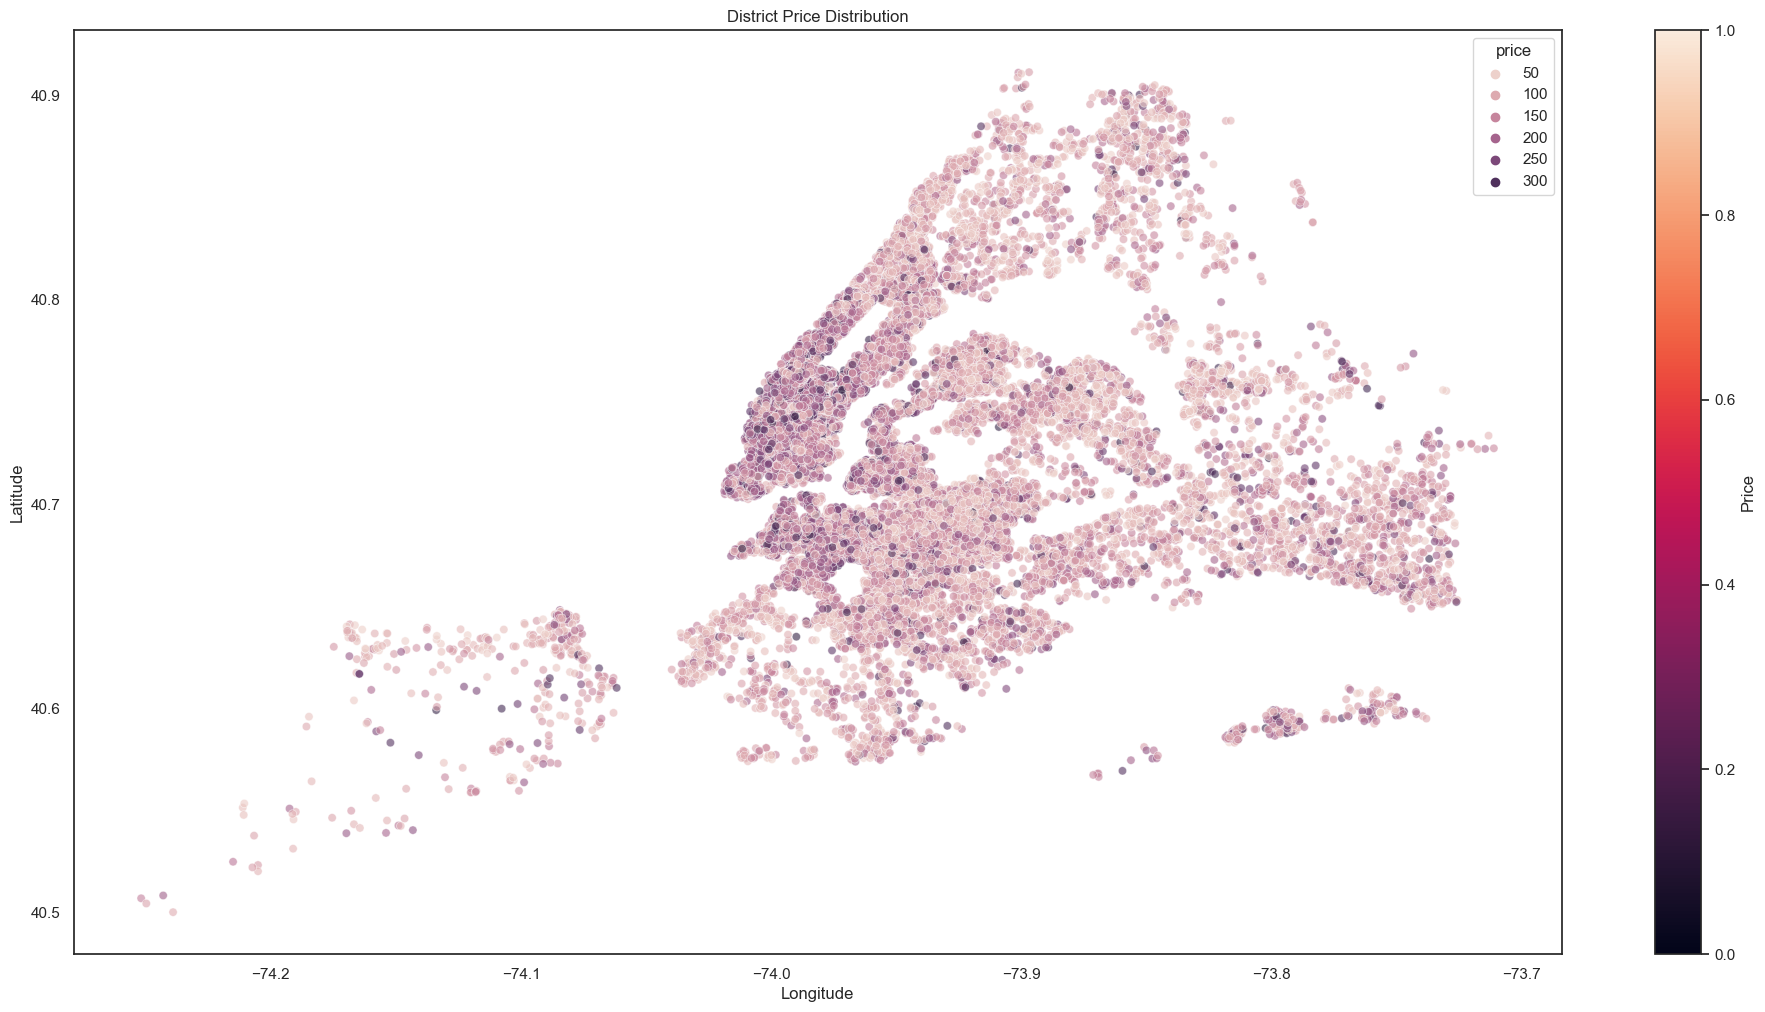

In [22]:
plt.figure(figsize=(24, 12))
plt.title('District Price Distribution')

sns.scatterplot(data=df, x='longitude', y='latitude', hue='price', cmap='YlOrRd', alpha=0.6)

plt.scatter(df['longitude'], df['latitude'], color='none', edgecolor='none')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Price')
plt.show()

Here we see price distribution heatmap

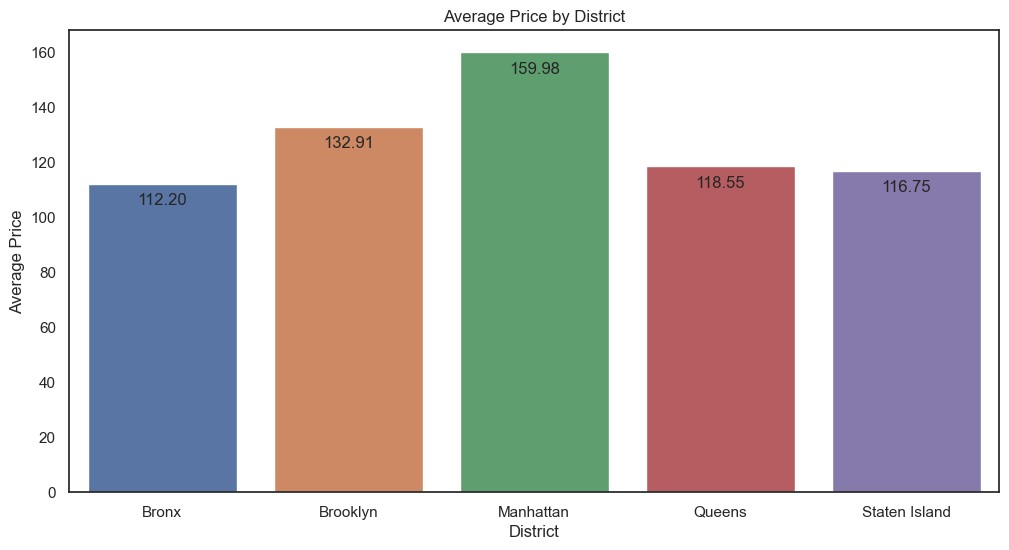

In [23]:
df34 = df[['District', 'price']]
df34 = df.groupby(['District'], as_index=False)[['price']].mean()

plt.figure(figsize=(12, 6))
df34 = sns.barplot(x="District", y="price", data=df34)
for p in df34.patches:
    df34.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 12, 
                   xytext = (0, -12), textcoords = 'offset points')
    
plt.xlabel('District')
plt.ylabel('Average Price')
plt.title('Average Price by District')
plt.show()

Here we see the average price by district (remember we removed most expensive listings beforehand)

#### 5) Boxplot : Listing price by Room type / Average Price by Room Type


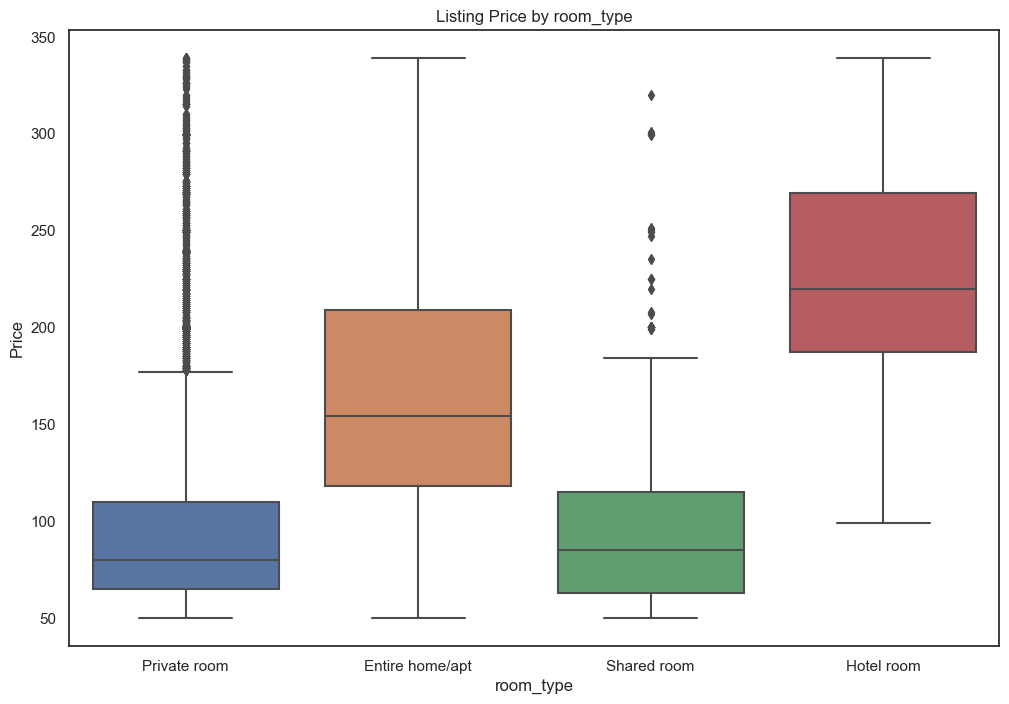

In [24]:
plt.figure(figsize=(12, 8))
plt.title('Listing Price by room_type')

sns.boxplot(data=df, x='room_type', y='price')

plt.xlabel('room_type')
plt.ylabel('Price')

plt.show()

The following boxplots shows the distribution of listing prices across by Room type

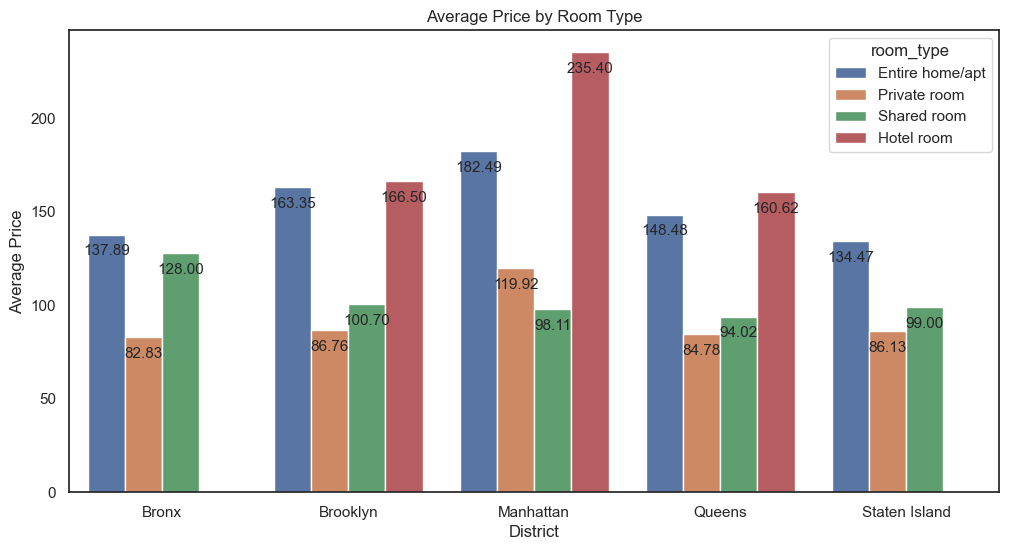

In [25]:
df_4 = df[['District', 'room_type', 'price']]
df_4 = df_4.groupby(['District', 'room_type'], as_index=False)[['price']].mean()

plt.figure(figsize=(12, 6))
sns.set_theme(style='white')
df_4 = sns.barplot(x="District", y="price", data=df_4, hue='room_type')
for p in df_4.patches:
    df_4.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 11, 
                   xytext = (0, -12), textcoords = 'offset points')
    
plt.xlabel('District')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()

In this column chart, the data is grouped by District and room type. Manhattan maintains the highest prices for entire homes, private rooms and hotel rooms, and the average price for a shared room costs more than a private room in all the other Districts.

Considering that Manhattan and Brooklyn are likely the most popular Districts among tourists, it makes sense that the prices are higher than in Queens, the Bronx, and Staten Island – mostly residential areas.

#############################################################################################################

Key Findings
1) Manhattan has the highest number of listings and is the most expensive district to rent hotel rooms, entire homes and private rooms.
2) Brooklyn has the second-highest number of listings and is the second most expensive district for rentals.
3) Manhattan and Brooklyn make up for 79% of listings available in NYC.
4) The Bronx is the most affordable (on average) district to rent entire homes and private rooms, while Queens is the most affordable(on average) district to rent shared room.
5) The top 10 neighborhoods with the most listings are located either in Manhattan or Brooklyn, with Midtown and Bedford–Stuyvesant presenting leading numbers in each district, respectively.
6) I couldn't analize the relationship between amenities and pricing because that information was given as a text.

Conclusion

We can conclude from this analysis that Manhattan is the #1 district of NYC when it comes to the number of listings and highest rental prices. Given that Manhattan is world-famous for its museums, stores, parks, and theaters — and its substantial number of tourists throughout the year, it makes perfect sense that prices are much higher in this district.

Brooklyn comes in second, showing a significant number of listings and more affordable prices if compared to Manhattan. With most listings located in Williamsburg and Bedford-Stuyvesant — two neighborhoods strategically close to Manhattan — tourists get the chance to enjoy both districts equally while spending less.

As for the other districts — Queens, Bronx, and Staten Island — it becomes clear that there aren’t as many listing options available, especially on Staten Island. Considering that those are rather residential areas, it is possible that many guests choose those locations to save up money or perhaps to visit family and friends who live in the area.

##############################################################################################################